## Graph #2: The Q-Q Plot

We will now learn how to interpret a second type of graph: the Q-Q ("Quantile-Quantile") Plot. Q-Q Plots will help us to check our *normally-distributed errors* assumption - if the errors in our model are not normally distributed, then we cannot trust any confidence or prediction intervals generated from the model. Consider, for example, the following dataset:

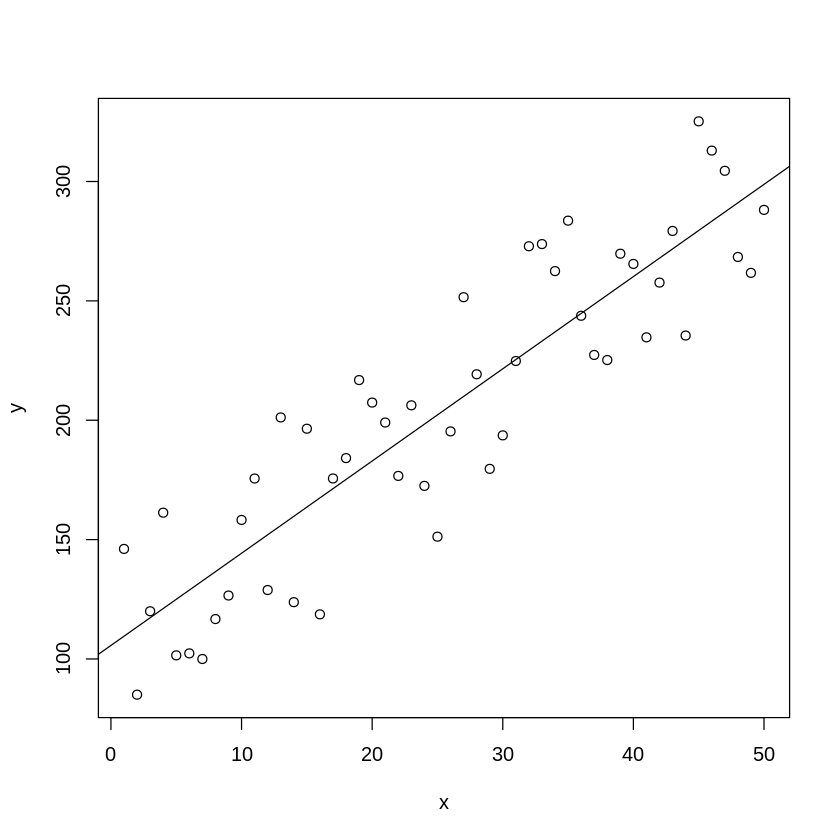

In [1]:
qq.df <- read.csv("data/qq.csv")
plot(y ~ x, data=qq.df)
model <- lm(y ~ x, data=qq.df)
abline(model)

On the surface, this dataset does not look very different than any of our other datasets. It is a linear relationship with some noise. The residuals vs. fits plot that we learned about in the previous lesson shows the desired even spread:

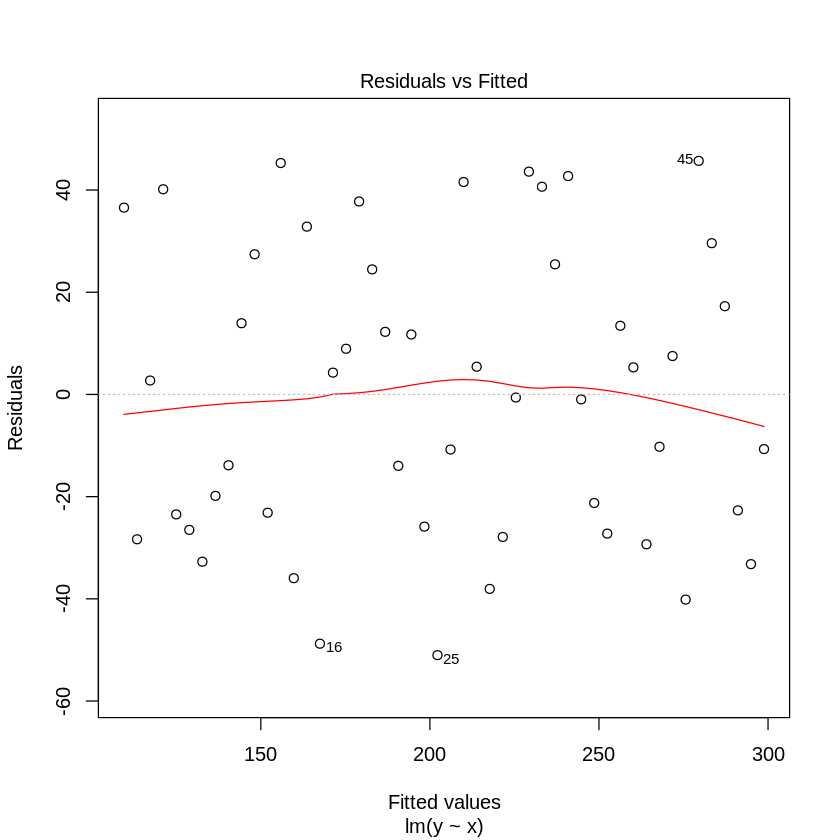

In [2]:
plot(model, which=1)

However, there is a problem. In order for prediction and confidence intervals computed from our model to be accurate, our residuals must be *normally distributed*. Without getting too deep into the mathematical details, this roughly means that if we plot a histogram of our model's residuals it should resemble a zero-centered "bell curve" like that shown below:

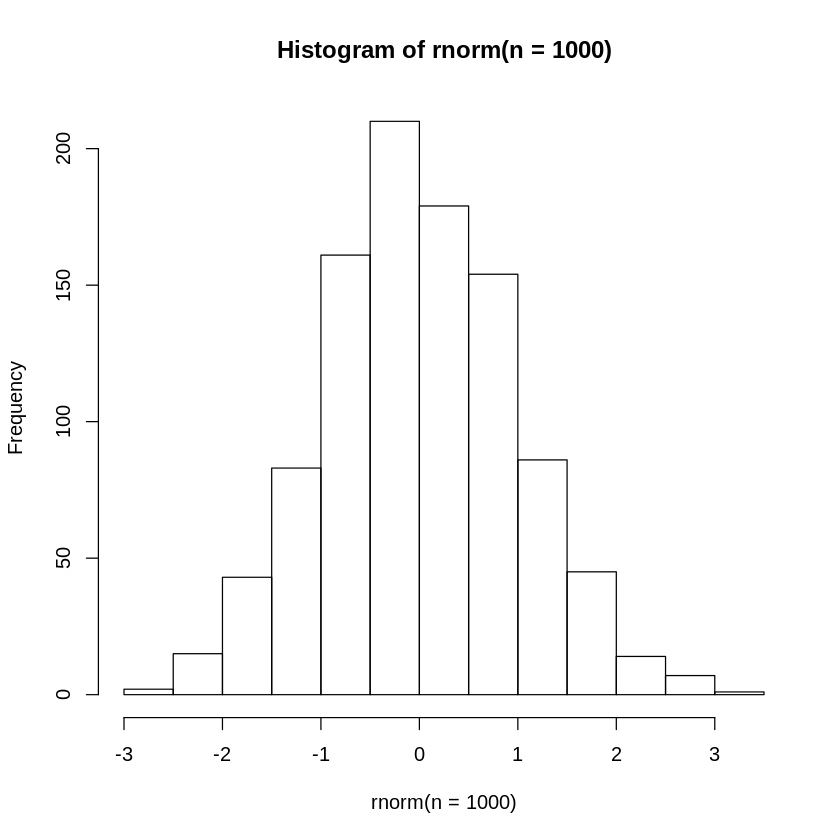

In [3]:
hist(rnorm(n=1000))

Do our residuals follow this pattern? Not really:

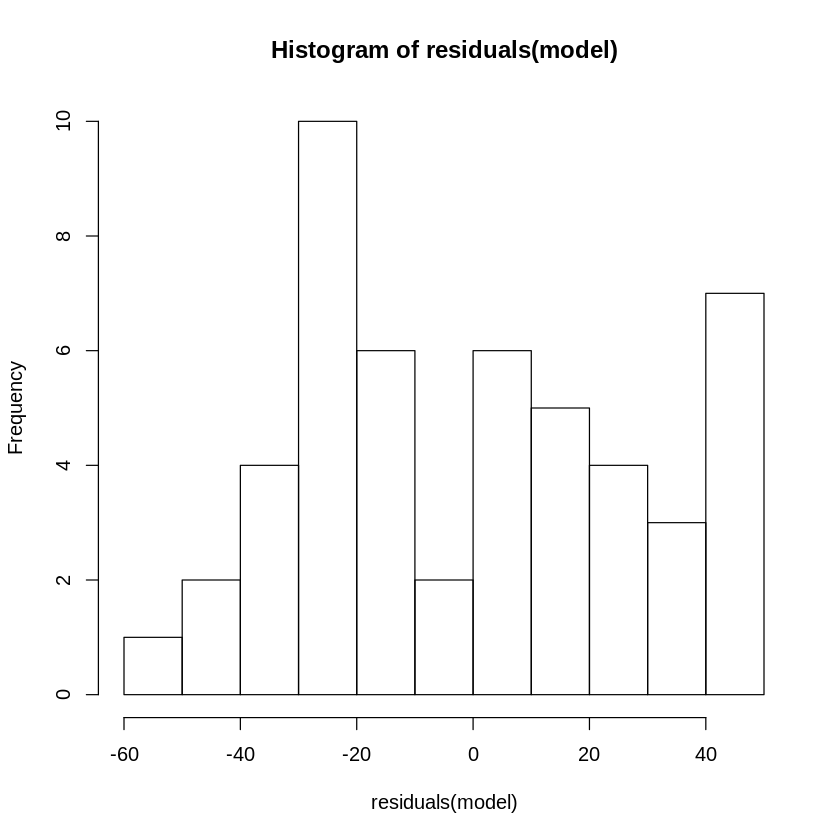

In [4]:
hist(residuals(model))

However, we get a very different picture simply by changing the histogram bin size:

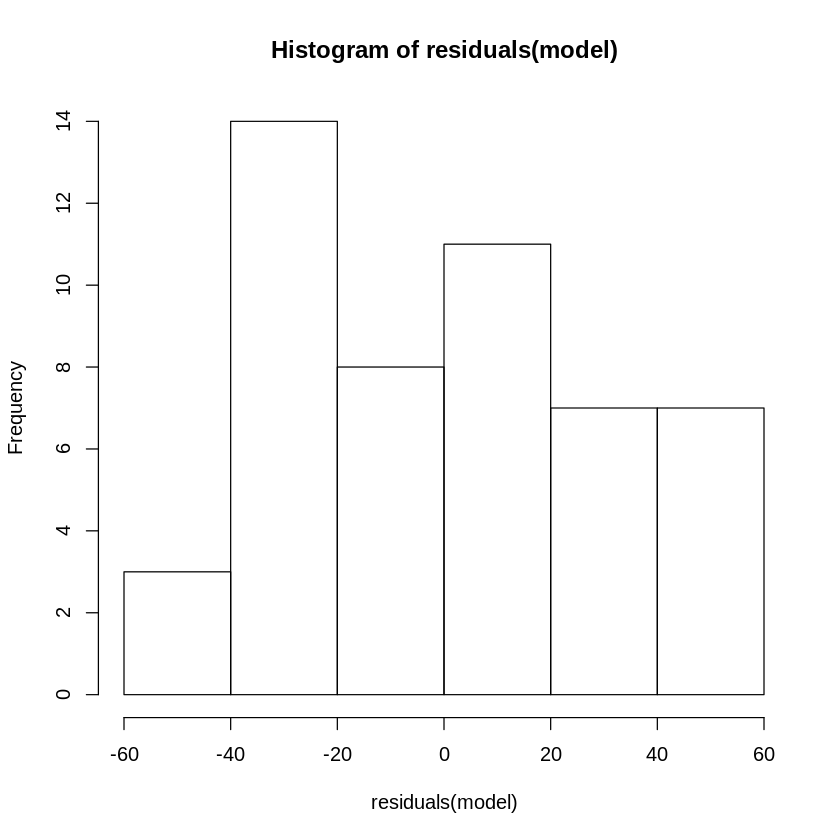

In [5]:
hist(residuals(model), breaks=5)

Is the result above "good enough?" Apparently, it is difficult to tell by looking at a histogram alone. It turns out that histograms are not actually well-suited to assessing the normality of our residuals because the appearance of the histogram can change drastically when different bin sizes are used. Instead, we will check the normality of our residuals using a `Q-Q plot`:

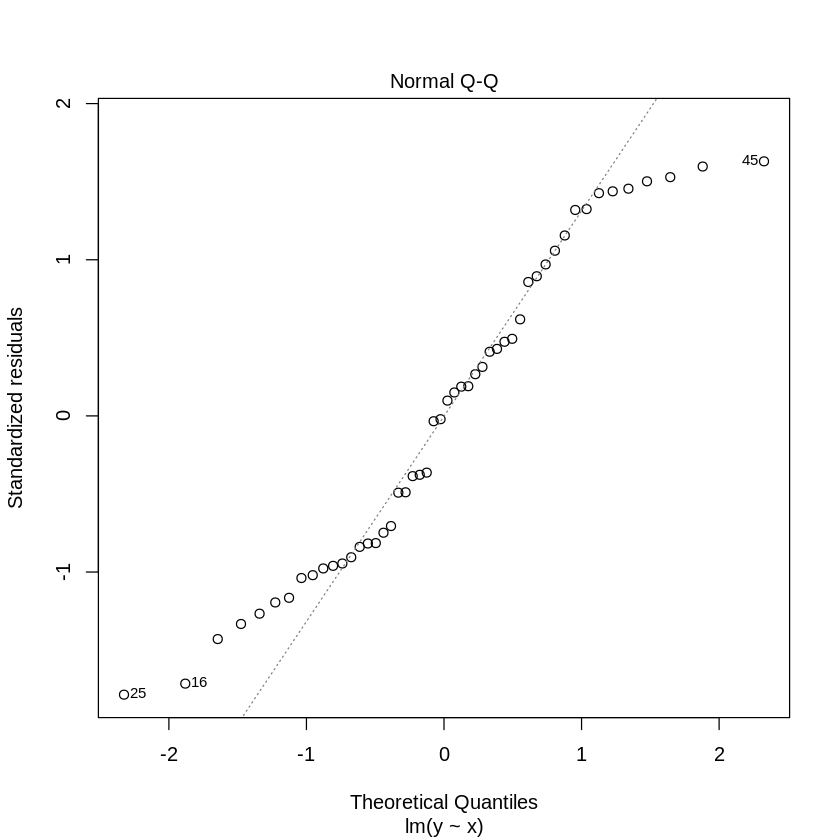

In [6]:
plot(model, which=2)

The Q-Q plot above shows how well the distribution of our residuals (represented on the `y` axis) matches that expected based on our assumption that these residuals follow a normal distribution (represented on the `x` axis.) If our distribution matched perfectly, we would see a perfectly straight line. Instead, we can see that the distribution matches well in the middle but very poorly in the tails (the regions further from zero) - this indicates that our errors are not normally distributed and our model's prediction and confidence intervals should not be trusted. 

<span style="color:blue;font-weight:bold">Exercise</span>: Perform the following actions:

* Load the data contained in the file `data/ice-cream-sales.csv` and store it in the dataframe `ice.cream.df`
* Create a linear model for the relationship `DailySalesContainers ~ DailyHighTemperatureC` and store the result in the variable `model.ice.cream` 
* Use `plot` as shown above to produce a Q-Q plot for `model.ice.cream`
* Set the value of the variable `has.normal.errors` to `TRUE` if the Q-Q plot shows the desired (mostly) straight line, otherwise set it to `FALSE`


Call:
lm(formula = DailySalesContainers ~ DailyHighTemperatureC, data = ice.cream.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.432  -7.481  -0.333   8.209  35.174 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -143.8641    10.1889  -14.12   <2e-16 ***
DailyHighTemperatureC    7.8028     0.3033   25.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.84 on 98 degrees of freedom
Multiple R-squared:  0.871,	Adjusted R-squared:  0.8697 
F-statistic: 661.7 on 1 and 98 DF,  p-value: < 2.2e-16


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-24.4317  -7.4810  -0.3331   0.0000   8.2091  35.1739 

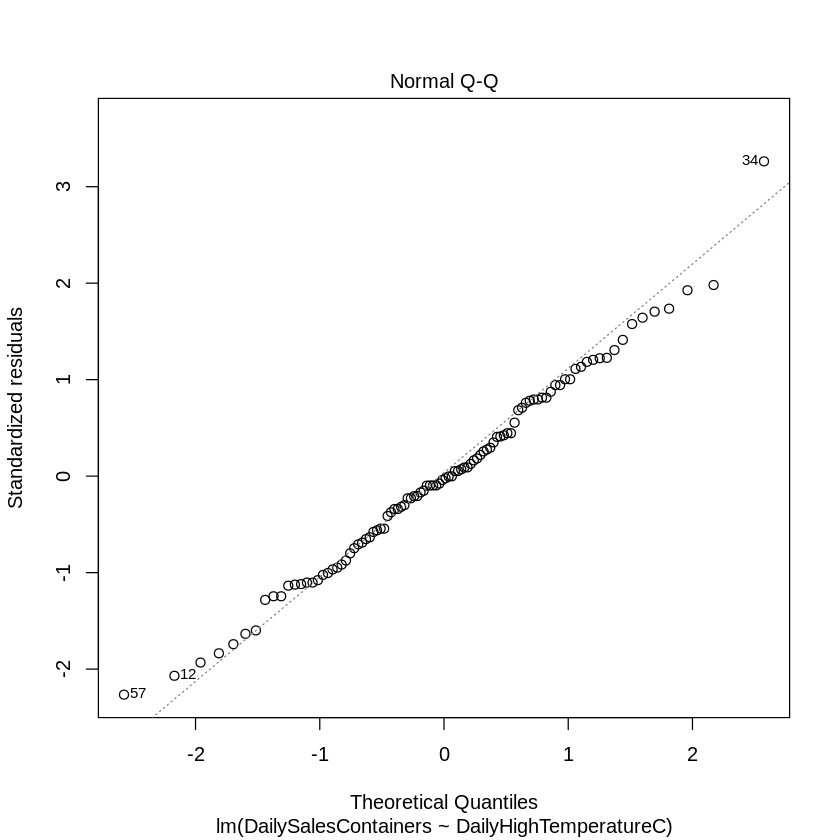

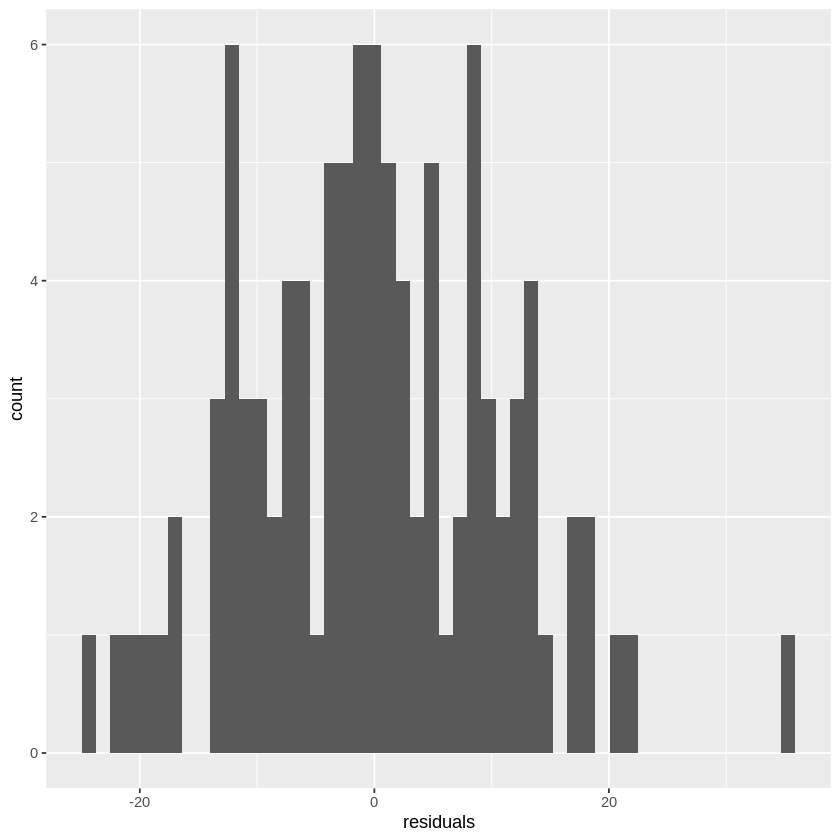

In [43]:
# delete this entire line and replace it with your code

ice.cream.df <- read.csv('data/ice-cream-sales.csv')

model.ice.cream <- lm(DailySalesContainers ~ DailyHighTemperatureC, data=ice.cream.df)

plot(model.ice.cream, which=2)
summary(model.ice.cream)

has.normal.errors <- TRUE

library(ggplot2)
model.res <- residuals(model.ice.cream)
summary(as.numeric(model.res))

model.res.df <- as.data.frame(as.numeric(model.res))

names(model.res.df) <- "residuals"
ggplot(data=model.res.df) + geom_histogram(aes(residuals), bins=50) 

In [44]:
correct.ice.cream.df <- read.csv("data/ice-cream-sales.csv")
check.variable.value("ice.cream.df", correct.ice.cream.df)
check.variable.definition("model.ice.cream")
correct.model.ice.cream <- lm(DailySalesContainers ~ DailyHighTemperatureC, data=ice.cream.df)
assert.true(all(coefficients(model.ice.cream) == coefficients(correct.model.ice.cream)), "Did you set <code>model.ice.cream</code> correctly?")
check.variable.definition("has.normal.errors")
assert.true(has.normal.errors, "While the Q-Q plot is not a perfectly straight line, it is certainly close enough that we may assume that the normality assumption is satisfied.")
success()

Correct!